In [21]:
import os
import cv2
import matplotlib.pyplot as plt

def search(dirname):
    file_list = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_list.append(full_filename)
    
    return file_list

file_list = search('mini_test')

In [22]:
file_list

['mini_test\\01f786bbd209_1.jpg',
 'mini_test\\1f50f0355c6b_1.jpg',
 'mini_test\\21ac69fb72b9_8.jpg',
 'mini_test\\2cf5d0cbbb1c_1.jpg',
 'mini_test\\2d7ce2495104_2.jpg',
 'mini_test\\314da1bd6c0f_0.jpg',
 'mini_test\\5a4690b96b0d_0.jpg',
 'mini_test\\5d6979a1be52_3.jpg',
 'mini_test\\88ffad19912c_0.jpg',
 'mini_test\\8abc8df6cf20_1.jpg',
 'mini_test\\c191e2dfc5ae_0.jpg',
 'mini_test\\db78de9f1ca5_3.jpg']

In [23]:
image_1 = cv2.imread(file_list[0])

In [24]:
image_1.shape

(600, 600, 3)

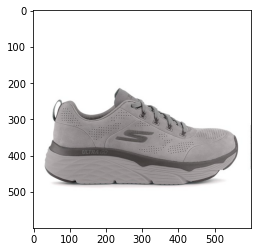

In [25]:
plt.imshow(image_1)

In [26]:
image_2 = cv2.imread(file_list[1])

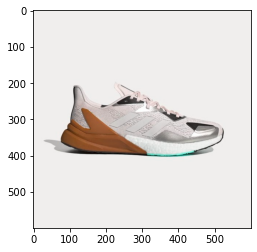

In [27]:
plt.imshow(image_2)

In [28]:
image_3 = cv2.imread(file_list[8])

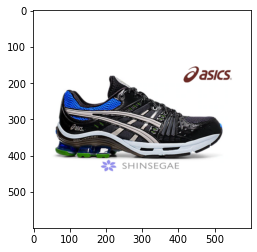

In [29]:
plt.imshow(image_3)

In [46]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def search(dirname):
    file_list = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_list.append(full_filename)
    
    return file_list

file_list = search('mini_test')

In [47]:
file_list

['mini_test\\01f786bbd209_1.jpg',
 'mini_test\\1f50f0355c6b_1.jpg',
 'mini_test\\21ac69fb72b9_8.jpg',
 'mini_test\\2cf5d0cbbb1c_1.jpg',
 'mini_test\\2d7ce2495104_2.jpg',
 'mini_test\\314da1bd6c0f_0.jpg',
 'mini_test\\5a4690b96b0d_0.jpg',
 'mini_test\\5d6979a1be52_3.jpg',
 'mini_test\\88ffad19912c_0.jpg',
 'mini_test\\8abc8df6cf20_1.jpg',
 'mini_test\\c191e2dfc5ae_0.jpg',
 'mini_test\\db78de9f1ca5_3.jpg']

## 신발 아래있는 상표 지우기

In [76]:

image_3 = cv2.imread(file_list[8])

In [77]:
chan_img = image_3

In [78]:
def count_num(a_list):
    find_num_list = []
    for i in range(len(a_list)):
        if a_list[i] != 0:
            find_num_list.append(a_list[i])
            
    return find_num_list
        
                
        

In [79]:
def make_img_list(image) : 
    # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
    # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
    find_x_list = []
    find_y_list = []
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
                if np.all(image[i][j] != 255) : #흰 바탕 이미지 일 때
                    find_x_list.append(i)
                    find_y_list.append(j)

    return find_x_list, find_y_list

# list의 최대값 찾기
def max_img_num(img_list):
    max_img_num = img_list[0]
    for i in range(len(img_list)):
        if max_img_num < img_list[i]:
            max_img_num = img_list[i]
    return max_img_num
# list의 최소값 찾기
def min_img_num(img_list):
    min_img_num = img_list[0]
    for i in range(len(img_list)):
        if min_img_num > img_list[i]:
            min_img_num = img_list[i]
    return min_img_num

# 특정 좌표의 x_list 만들기
def make_x_list(image, a) : 
    # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
    # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
    find_x_list = []
    for i in range(image.shape[0]) :
        if np.all(image[i][a] != 255) : #흰 바탕 이미지 일 때
                find_x_list.append(i)

    return find_x_list

In [80]:
x = make_img_list(image_3)

In [81]:
img_3_x_list, img_3_y_list = make_img_list(image_3)
img_3_min_y = min_img_num(img_3_y_list)
img_3_max_x = max_img_num(img_3_x_list)

In [82]:
img_3_max_x, img_3_min_y

(444, 52)

In [83]:
img_max_x = max_img_num(make_x_list(image_3, 52))

In [84]:
img_max_x

402

In [85]:
import tqdm

In [99]:
from tqdm.notebook import tqdm
for i in tqdm(range(402, chan_img.shape[0])):
    for j in range(chan_img.shape[1]):
        chan_img[i][j] = [235,235,235]

  0%|          | 0/198 [00:00<?, ?it/s]

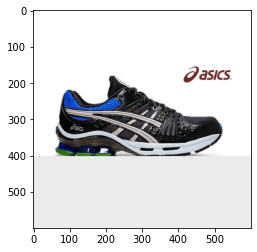

In [100]:
plt.imshow(chan_img)

## 신발 위에 있는 상표 지우기
  - 보통, 신발 이미지의 위쪽에 있기 떄문에, 처음으로 선택되는, 값이 255가 아닌 좌표를 찾고, x축으로 +60,y축으로 좌우 합이 170이 되는 박스를 찾아 지워보자

In [ ]:
chan_2 = chan_img

In [ ]:
#처음으로 선택되는 좌표 찾기
count = 0
logo_x, logo_y = 0, 0
for i in range(chan_2.shape[0]) :
        for j in range(chan_2.shape[1]) :
                if count == 0:
                    if np.all(chan_2[i][j] != 255) : #흰 바탕 이미지 일 때
                        logo_x, logo_y = i, j
                        count += 1

In [ ]:
logo_x, logo_y

In [ ]:
for i in range(logo_x-10, logo_x + 60 ):
    for j in range(logo_y-50, logo_y+150):
        chan_2[i][j] = [255, 255, 255]

In [ ]:
plt.imshow(chan_img)

In [ ]:
plt.imshow(chan_2)

In [ ]:
cv2.imwrite("test_first.jpg", chan_img)
cv2.imwrite("test_second.jpg", chan_2)

In [ ]:
plt.imshow(chan_img)

## image_1은 255가 몇개의 픽처를 담당하고 있는가?

In [ ]:
count = 0
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        if image_1[i][j][2] == 255:
            count += 1
print(count)

In [ ]:
(image_1).shape

## 로고 지우기 코드 합쳐보기

In [ ]:
def count_num(a_list):
    find_num_list = []
    for i in range(len(a_list)):
        if a_list[i] != 0:
            find_num_list.append(a_list[i])
            
    return find_num_list
        
                
        

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

class logo_delete :
    def __init__(self, image_path):
        self.img = cv2.imread(image_path)
            
    def count_num(self, a_list):
        find_num_list = []
        for i in range(len(a_list)):
            if a_list[i] != 0:
                find_num_list.append(a_list[i])

        return find_num_list

    def make_img_list(self) : 
        # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
        # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
        find_x_list = []
        find_y_list = []
        for i in range(self.img.shape[0]) :
            for j in range(self.img.shape[1]) :
                    if np.all(self.img[i][j] != 255) : #흰 바탕 이미지 일 때
                        find_x_list.append(i)
                        find_y_list.append(j)

        return find_x_list, find_y_list

    # list의 최대값 찾기
    def find_max_num(self, img_list):
        max_num = img_list[0]
        for i in range(len(img_list)):
            if max_num < img_list[i]:
                max_num = img_list[i]
        return max_num
    # list의 최소값 찾기
    
    def find_min_num(self, img_list):
        min_num = img_list[0]
        for i in range(len(img_list)):
            if min_num > img_list[i]:
                min_num = img_list[i]
        return min_num

    # 특정 좌표의 x_list 만들기
    def make_x_list(self, a) : 
        # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
        # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
        find_x_list = []
        for i in range(self.img.shape[0]) :
            if np.all(self.img[i][a] != 255) : #흰 바탕 이미지 일 때
                    find_x_list.append(i)

        return find_x_list
    
    
    def bottom_logo_delete(self):
        # 이미지의 하단부 로고를 제거한다.
        #600,600 배열의 배열의의 이미지에서 이미지는 보통 높이 x는 200부터 400까지, 너비 y는 100부터 500까지 위치해 있으며
        #Logo의 경우 신발 아래 부분의 경우, 바닥의 아랫부분의 x값부터,
        #너비는 이미지 가운데인 300으로부터 좌우 너비 100~150 사이씩으로 구성되어 있다.
        #그래서 뒷꿈치로부터 너비 50정도의 여유를 주고, 이 y좌표에 있는 가장 큰 x값을 바닥으로 설정하였다.
        
        #이미지가 담겨있는 x좌표, y좌표를 찾자
        img_x_list, img_y_list = self.make_img_list()
        
        #가장 좌측에 있는 신발의 y좌표를 찾자. 신발의 뒷꿈치 부분을 찾는 것.
        img_min_y = self.find_min_num(img_y_list)
        

        
        # 신발 뒤꿈치로부터 50정도 y축으로 이동하고, 그 좌표에서 신발 바닥을 찾는 코드
        bottom = self.find_max_num(self.make_x_list(img_min_y + 50))

        # 아래 로고를 지운 이미지를 del_bottom_logo라고 정의하겠다.
        del_bottom_logo = self.img
        
        # 신발 바닥으로부터 아래 부분의 코드는 모두 하얗게 칠해주겠다.
        for i in range(bottom, self.img.shape[0]):
            for j in range(self.img.shape[1]):
                del_bottom_logo[i][j] = [255,255,255]
        
        return del_bottom_logo
        
    def top_logo_delete(self):
        # 이미지의 상단부 로고를 제거한다.
        # 상단 부분의 로고는, 좌측 상단과 중앙(신발 위에), 그리고 우측 상단에 있는 경우, 세가지로 나누어 볼 수 있다.
        
        
        
        #이미지가 담겨있는 x좌표, y좌표를 찾자
        img_x_list, img_y_list = self.make_img_list()
        
        #가장 좌측에 있는 신발의 y좌표를 찾자. 신발의 뒷꿈치 부분을 찾는 것.
        img_min_y = self.find_min_num(img_y_list)
        
        #600,600의 이미지는 보통 높이 x는 200부터 400까지, 너비 y는 100부터 500까지 위치해 있으며
        #Logo의 경우 신발 아래 부분의 경우, 바닥의 아랫부분의 x값부터,
        #너비는 이미지 가운데인 300으로부터 좌우 너비 100~150 사이씩으로 구성되어 있다.
        #그래서 뒷꿈치로부터 너비 50정도의 여유를 주고, 이 y좌표에 있는 가장 큰 x값을 바닥으로 설정하였다.
        
        # 신발 뒤꿈치로부터 50정도 y축으로 이동하고, 그 좌표에서 신발 바닥을 찾는 코드
        bottom = self.find_max_num(self.make_x_list(img_min_y + 50))

        # 아래 로고를 지운 이미지를 del_bottom_logo라고 정의하겠다.
        del_bottom_logo = self.img
        
        # 신발 바닥으로부터 아래 부분의 코드는 모두 하얗게 칠해주겠다.
        for i in range(bottom, self.img.shape[0]):
            for j in range(self.img.shape[1]):
                del_bottom_logo[i][j] = [255,255,255]
        
        # 상단 부분의 로고는, 맨 처음, 255가 아닌 값의 좌표값을 찾고, 좌표를 포함한, 200, 100의 

In [ ]:
file_list[8]

In [ ]:
img = cv2.imread(file_list[8])
plt.imshow(img)

In [ ]:
a = logo_delete(file_list[8])

In [ ]:
first_img = a.bottom_logo_delete()
plt.imshow(first_img)

In [ ]:
def make_img_list(image) : 
    # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
    # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
    find_x_list = []
    find_y_list = []
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
                if np.all(image[i][j] != 255) : #흰 바탕 이미지 일 때
                    find_x_list.append(i)
                    find_y_list.append(j)

    return find_x_list, find_y_list

# list의 최대값 찾기
def max_img_num(img_list):
    max_img_num = img_list[0]
    for i in range(len(img_list)):
        if max_img_num < img_list[i]:
            max_img_num = img_list[i]
    return max_img_num
# list의 최소값 찾기
def min_img_num(img_list):
    min_img_num = img_list[0]
    for i in range(len(img_list)):
        if min_img_num > img_list[i]:
            min_img_num = img_list[i]
    return min_img_num

# 특정 좌표의 x_list 만들기
def make_x_list(image, a) : 
    # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
    # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
    find_x_list = []
    for i in range(image.shape[0]) :
        if np.all(image[i][a] != 255) : #흰 바탕 이미지 일 때
                find_x_list.append(i)

    return find_x_list

In [ ]:
find_x, find_y = make_img_list(first_img)

In [ ]:
a = min_img_num(find_x)

In [ ]:
b

In [ ]:
for j in range(180, image_3.shape[1]):
    x_list = []
    for i in range(img_max_x, 500):
        if np.all(image_3[i][j] == 255)  :
            x_list.append(0)
        else :
            x_list.append(i)
    y_for_x_list = count_num(x_list)
    for z in range(len(y_for_x_list)):
        plot = y_for_x_list[z]
        chan_img[plot][j] = [255, 255, 255]

In [ ]:
img_3_x_list, img_3_y_list = make_img_list(image_3)
img_3_min_y = min_img_num(img_3_y_list)
img_3_max_x = max_img_num(img_3_x_list)

In [ ]:
img_3_max_x, img_3_min_y

In [ ]:
img_max_x = max_img_num(make_x_list(image_3, 52))

In [ ]:
img_max_x

In [ ]:
for j in range(180, image_3.shape[1]):
    x_list = []
    for i in range(img_max_x, 500):
        if np.all(image_3[i][j] == 255)  :
            x_list.append(0)
        else :
            x_list.append(i)
    y_for_x_list = count_num(x_list)
    for z in range(len(y_for_x_list)):
        plot = y_for_x_list[z]
        chan_img[plot][j] = [255, 255, 255]

In [ ]:
chan_2 = chan_img

In [ ]:
#처음으로 선택되는 좌표 찾기
count = 0
logo_x, logo_y = 0, 0
for i in range(chan_2.shape[0]) :
        for j in range(chan_2.shape[1]) :
                if count == 0:
                    if np.all(chan_2[i][j] != 255) : #흰 바탕 이미지 일 때
                        logo_x, logo_y = i, j
                        count += 1

In [ ]:
logo_x, logo_y

In [ ]:
for i in range(logo_x-10, logo_x + 60 ):
    for j in range(logo_y-20, logo_y+150):
        chan_2[i][j] = [255, 255, 255]

In [ ]:
cv2.imwrite("test_first.jpg", chan_img)
cv2.imwrite("test_second.jpg", chan_2)

In [ ]:
plt.imshow(chan_img)

In [ ]:
img_sho = cv2.imread(file_list[10])
plt.imshow(img_sho)

# 배경이 회색 또는 하얀색이 아닌 것 부터 제거

### 로고를 어떻게 지울까?
 - 1. Yolo
     - Yolo는 object detecting을 통한 이미지 검출 기능.
     - Box를 통해 검사를 하기 때문에, 검출하더라도 박스 내에 로고가 있으면 삭제되지 않는다.
     
 - 2. 유사도 
     - 유사도를 통해 사진을 지울 수 있을까?
     - 힘들다고 함
     
 - 3. OpenCV
     - Canny : 로고도 검출됨
     - Canny와 kp를 이용해봤는데, 로고가 결국 다지워지지 않음
     
 - 4. image_segmentation

In [ ]:
image = cv2.imread()
#이미지값이 255인 경우가 60퍼이상 경우만?
#체크해보기 
 

for i, i_key in enumerate(image[0]):
    for j, h_key in enumerate(image[1]):
         if image[i][j] == 255 :
             count  += 1

Percent = count/len(image) * 100
print(percent)

#---특정 퍼센트만 추출 끝

x_list =[]
y_list =[]
for i, i_key in enumerate(image[0]):
    for j, h_key in enumerate(image[1]):
         if image[i][j] != 255 :
           x_list.append(i)
           y_list.append(j)
img_box = np.zeros((len(x_list), len(y_list), 3), astype = unit8)

w = image.shape[1]
h = image.shape[0] 
box_w = img_box.shape[1]
box_h = img_box.shape[0]

img_w=w-box_w 
img_h = h -box_h

for i, i_key in enumerate(img_box.shape[0]):
    for j, h_key in enumerate(img_box.shape[1]):
         if image[i+img_h][j+img_w] != 255 :
             img_box[i][j] = image[i+ img_h][j+img_w]
